In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
from termcolor import colored as cl 
import seaborn as sns
from datetime import datetime

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.figsize'] = (20, 10)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [42]:
# data import 
df = pd.read_excel('Time Series Data.xlsx', index_col = 'Day')
df.head(10)


Series 1    Series 2    Series 3    Series 4    Series 5    Series 6  \
Day                                                                           
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1    100.172920  100.589993  103.823464   98.644063   99.750482  106.614321   
2     98.579911   98.767737  107.058757   97.936942   99.220660  110.602917   
3     98.397809   97.087379  107.352843  100.000000   99.251805  113.424191   
4     99.051233   99.716206  105.587978   99.703996   99.407530  113.715275   
5     98.177450   97.318895  106.764672   99.056674   97.786202  117.800899   
6     97.061884   95.108290  103.529379   97.288125   96.102227  115.466257   
7     98.429944   96.422704  102.941207   98.820469   97.567830  113.618247   
8     97.860684   95.108290  103.235293   98.231451   96.725842  114.397456   
9     96.224827   94.951456  100.588171   97.995246   95.416322  112.840531   

       Series 7    Series 8    Series 9   Series 10   Series 11   Series 12  \
Day                                                                           
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1    101.767999  100.732626   99.952576  100.227093   98.790108  100.032421   
2    100.681776  100.383846   99.617067  100.246064   98.754979   99.418521   
3    102.651998  101.569981   98.659381  101.230321   98.509591   98.384407   
4    100.710685  101.081407   99.760755  101.040888   96.686487   99.063150   
5     99.121810   98.221499  100.335509  101.097803   98.649591   97.802929   
6     96.960985   97.593600   98.707513  101.059860   99.719483   97.156608   
7     97.683150   98.116771  100.383641  101.684506   99.982435   98.061457   
8     97.371171   98.709605  102.873767  101.930570  100.157565  100.032421   
9     95.452958   99.651219   99.617067  102.858195   98.684720   99.709050   

      Series 13   Series 14   Series 15   Series 16   Series 17   Series 18  \
Day                                                                           
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1     96.316754  101.460335   98.573111  100.032584   99.004063  100.390444   
2     99.700262  102.108065   98.256322   99.558198   98.782991  101.258255   
3     97.980366  100.108347   97.886884   99.018405   98.838321  100.940089   
4     99.663613  100.325042   98.679303   98.887350   98.340352  100.535001   
5     99.532723   98.918881   99.471721   98.494664   99.962949  101.663108   
6     97.924084   95.564820   99.154932   99.623606  100.921834  101.156924   
7    100.897906   96.862634  101.478646  100.654317  101.438328  100.752072   
8     95.344241   95.348125  102.377255  100.752548   99.962949  100.766480   
9     95.269634   92.535802  102.958184   99.509083   98.985785   99.942130   

      Series 19   Series 20   Series 21   Series 22   Series 23   Series 24  \
Day                                                                           
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1    100.318979  101.568951   99.730607   99.673906   99.409461   99.113705   
2    102.048828  106.193229  101.541426   99.977798   99.577298   99.783831   
3    101.410870  106.936416  100.938414   99.278429   99.055138  100.875486   
4    101.521286  107.018993  101.448655   99.979185   99.602163  100.162127   
5    101.239112   95.293146  102.740313  100.693818  100.167837   99.535236   
6     99.116673   92.568126  100.685078  100.513425  100.491080   98.341980   
7     97.718071   92.568126  101.544102  100.679942  101.199726   98.767834   
8     97.399092   95.540875  101.900913  100.596684  101.541617   98.573281   
9     95.693780   93.641618  100.875972   99.819607  101.106483   98.151751   

      Series 25   Series 26   Series 27   Series 28   Series 29  
Day                                                              
0    100.000000  100.000000  100.000000  100.000000  100.000000  
1    100.0125

In [43]:
#RSI function
def get_rsi(close, window):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret.iloc[i] < 0:
            up.append(0)
            down.append(ret.iloc[i])
        else:
            up.append(ret.iloc[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = window - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = window - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df

In [49]:
def MA(data, window): 
    # generating simple moving average
    
    # data - is the series to generate signals for
    # window - is the window used to generate the average
    # lag - is how far % past the average before a signal is generated
    
    SMA = data.rolling(window = window).mean()
    return SMA
    


In [50]:
# To generate position and the respective buying/ selling price
def implement_rsi_strategy(data, rsi, SMA, lower, upper):
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0
    price = 0 
        
    for i in range(len(rsi)):
        if rsi.iloc[i-1] > lower and rsi.iloc[i] < lower and SMA.iloc[i] < data.iloc[i]:
            if signal != 1:
                buy_price.append(data.iloc[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi.iloc[i-1] < upper and rsi.iloc[i] > upper and SMA.iloc[i] > data.iloc[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data.iloc[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)

        position = []

    for i in range(len(rsi_signal)):    
        if rsi_signal[i] > 1:
            position.append(0)
        else:
            position.append(1)

    sigPriceBuy = []
    sigPriceSell = []

    for i in range(len(data)):
#         if i == len(data)-1 and position[i-1] == 1: 
#             position [i] == 0
#             sell_price[i] = data.iloc[i]
#         elif i == len(data)-1 and position[i-1] == 1: 
#             position [i] == 0
#             buy_price[i] = data.iloc[i]        
        if rsi_signal[i] == 1:
            position[i] = 1
        elif rsi_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
            
    return position, buy_price, sell_price
            
       

In [51]:
def PnL(data, position):
    gain = 0
    real_profit = 0
    series_ret = pd.DataFrame(np.diff(data)).rename(columns = {0:'returns'})
    for i in range(len(series_ret)):
        try:
            returns = series_ret['returns'][i]*position[i]
            gain += returns 
        except:
            pass
    diff = (data.iloc[-1] - data.iloc[0])
    real_profit = gain - diff
    return real_profit, diff 


In [57]:
# Testing series 28

df['rsi'] = get_rsi(df['Series 27'], 14)
df_temp = df.copy()
df_temp['rsi'] = df_temp['rsi'][4:]
df_temp = df_temp.dropna()

position_temp = implement_rsi_strategy(df_temp['Series 27'], df_temp['rsi'], MA(df_temp['Series 27'], 10), 30, 70)

position_df = pd.Series(position_temp)
profit_temp = PnL(df_temp['Series 27'], position_df[0])

# ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
# ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
# ax1.plot(temp_df['Series 27'], linewidth = 2.5, color = 'skyblue', label = 'IBM')
# ax1.plot(temp_df.index, position_temp[1], marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
# ax1.plot(temp_df.index, position_temp[2], marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
# ax1.set_title('RSI TRADE SIGNALS')
# ax2.plot(temp_df['rsi'+column], color = 'orange', linewidth = 2.5)
# ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
# ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
# plt.show()



(-2.842170943040401e-14, 169.31517125915087)


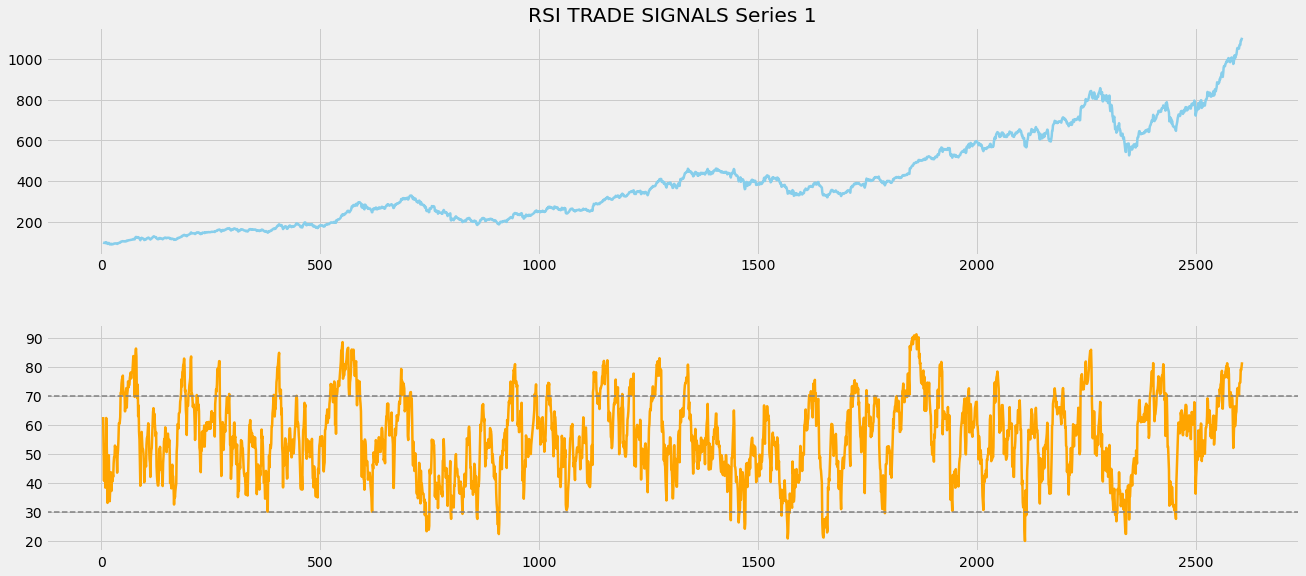

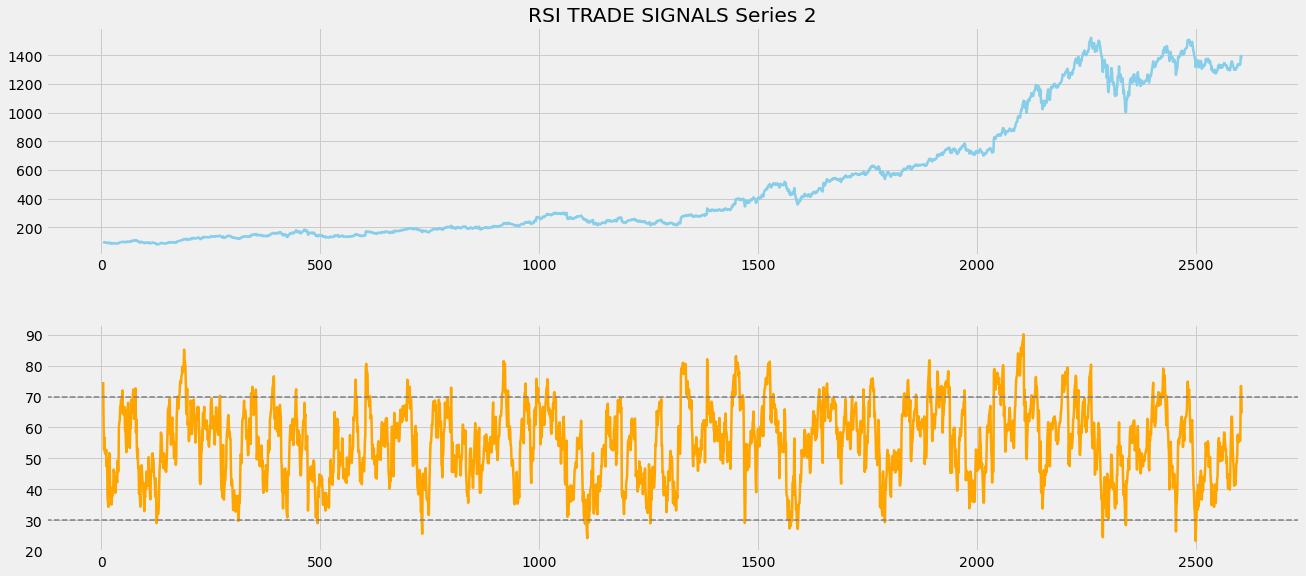

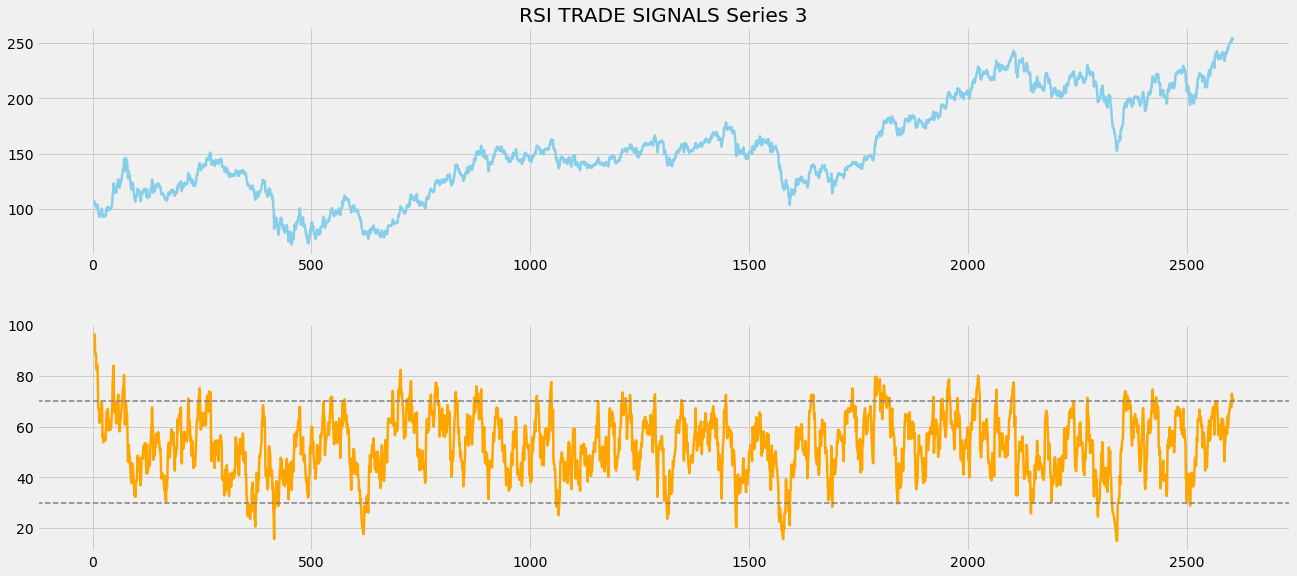

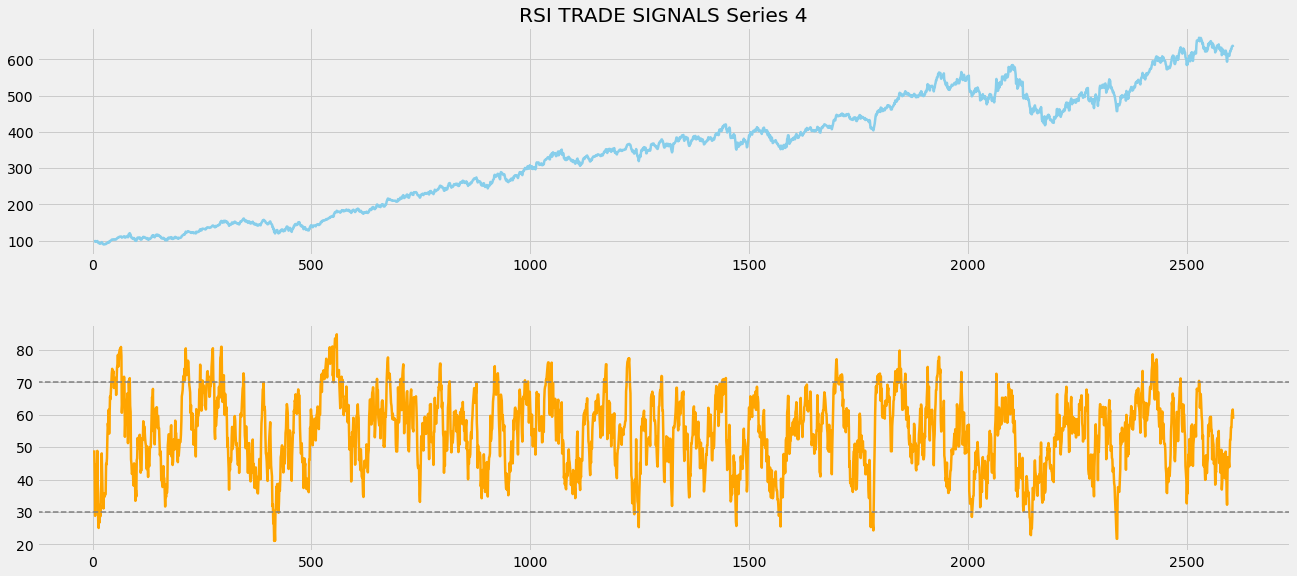

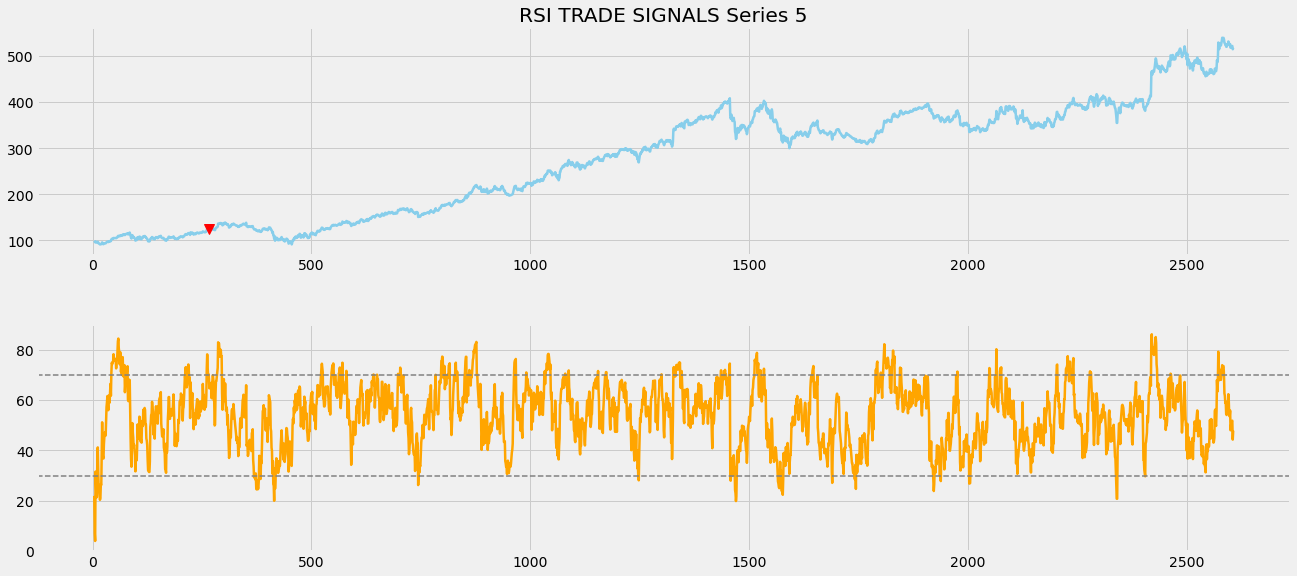

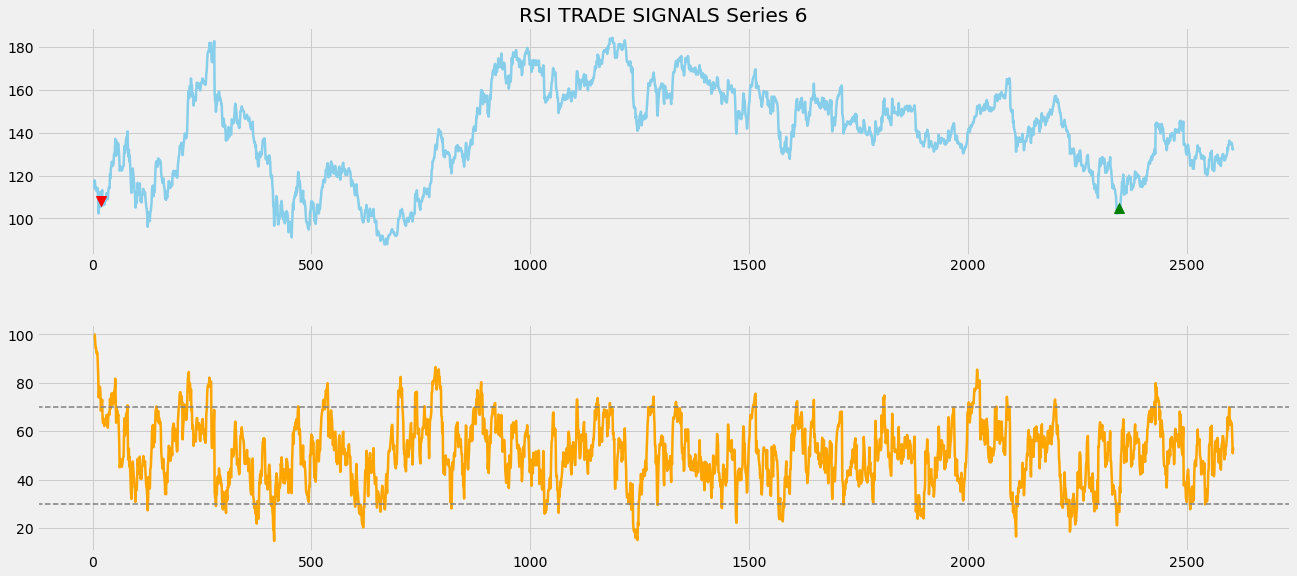

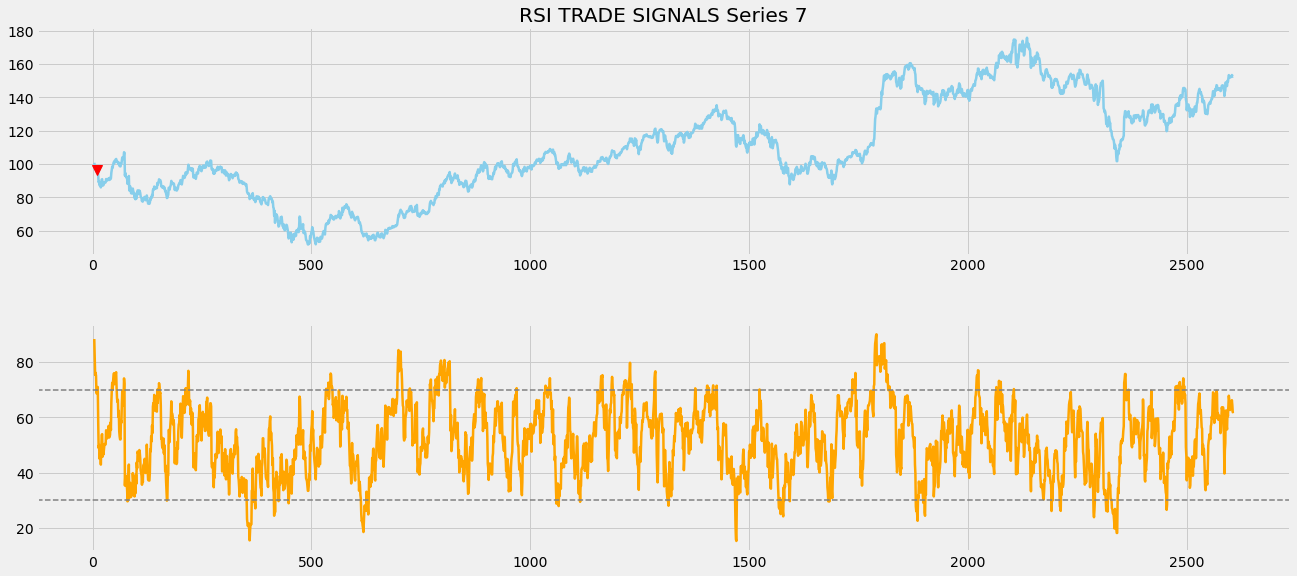

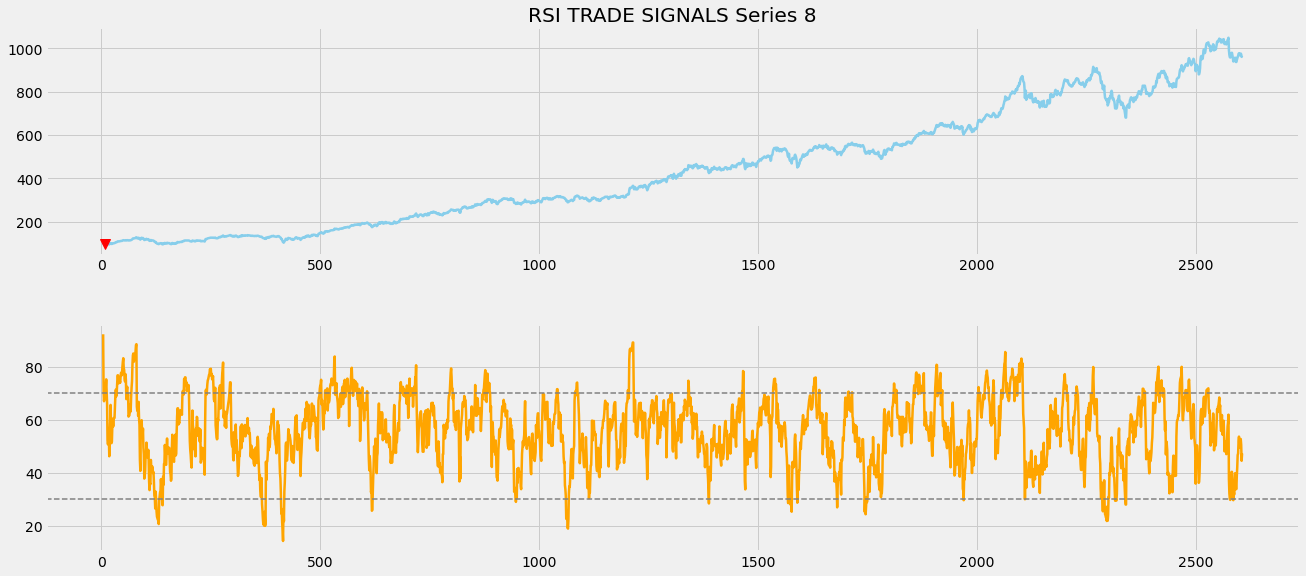

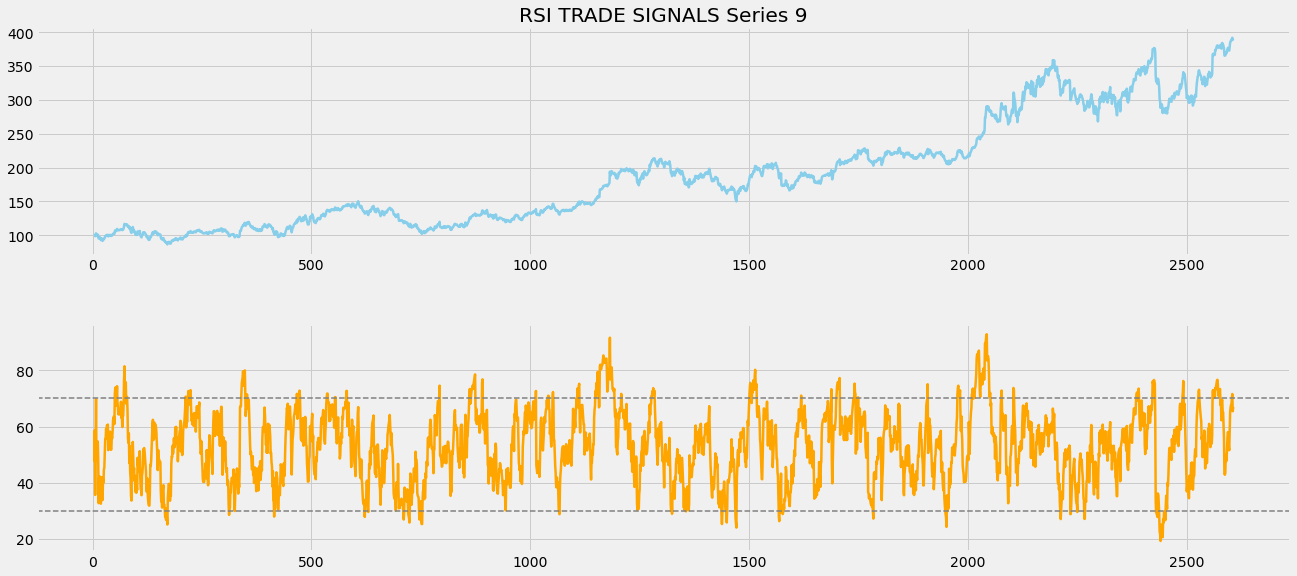

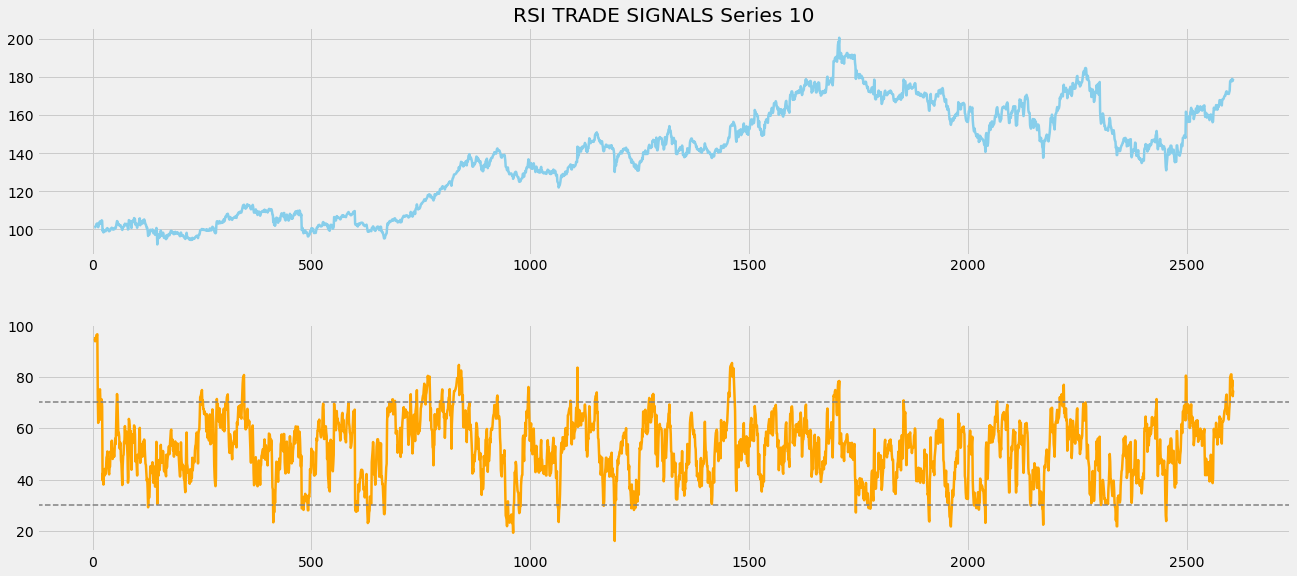

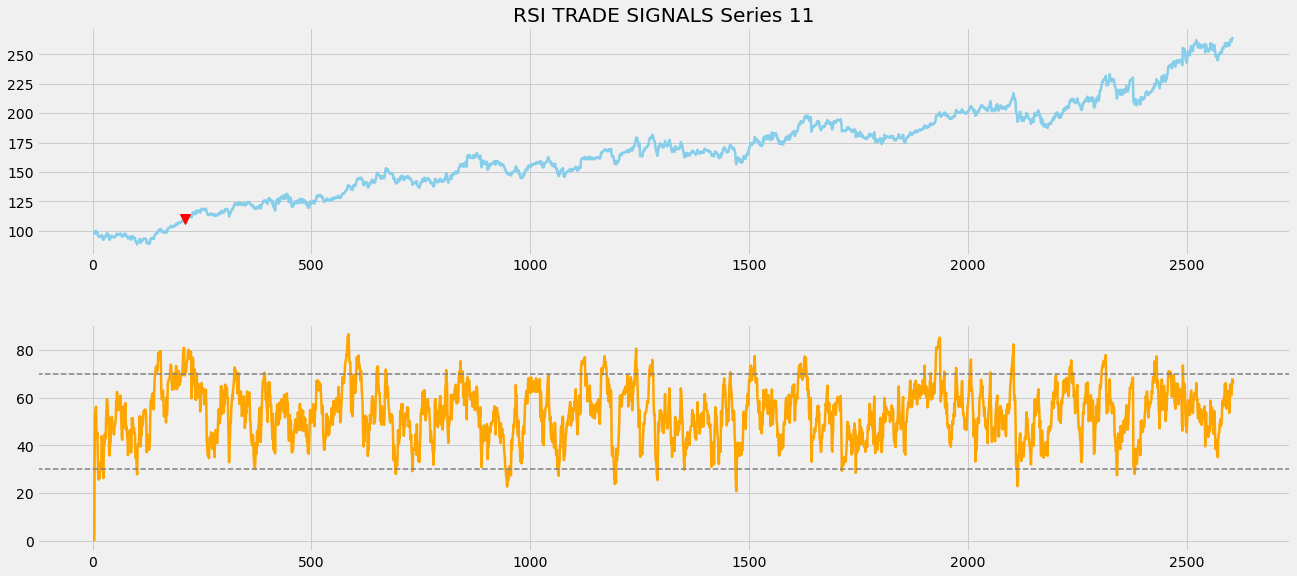

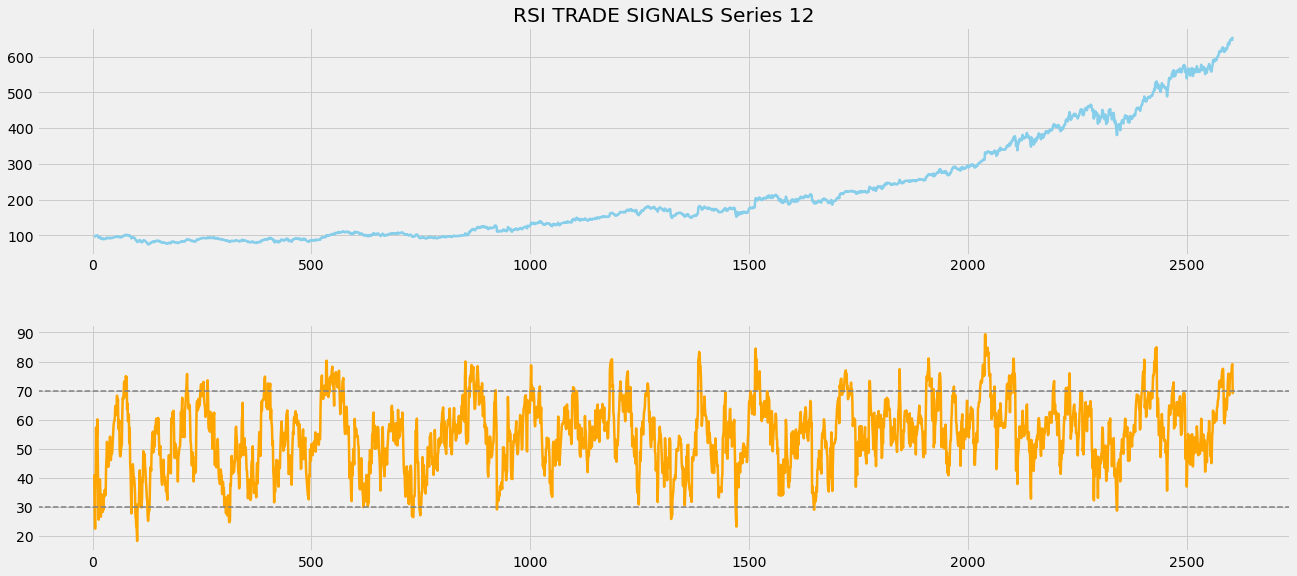

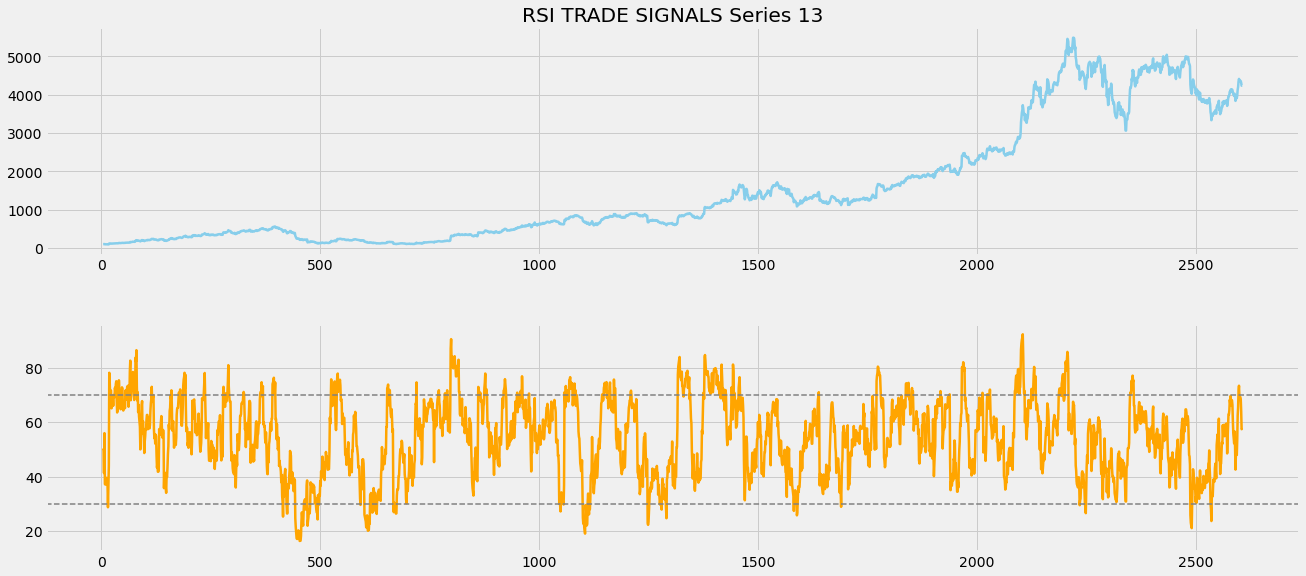

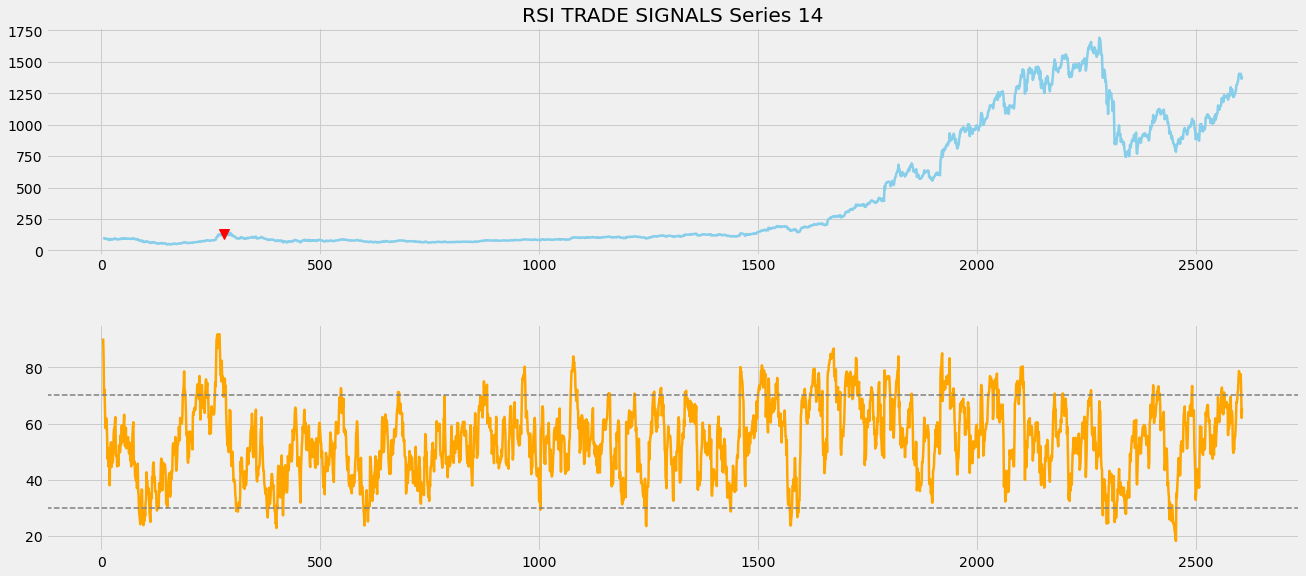

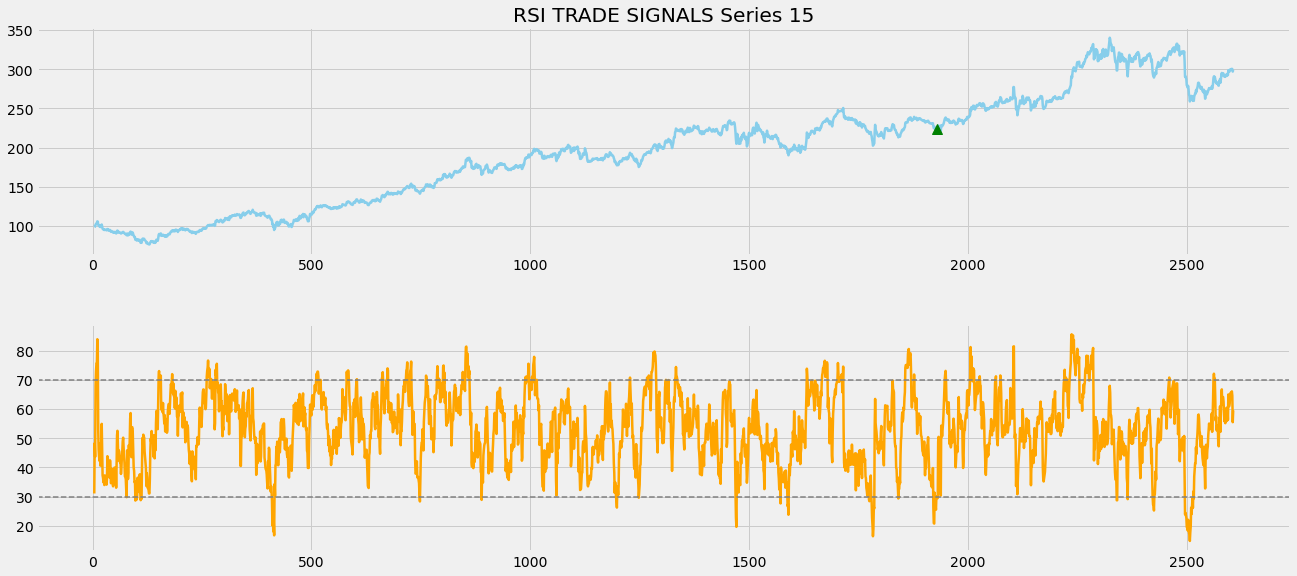

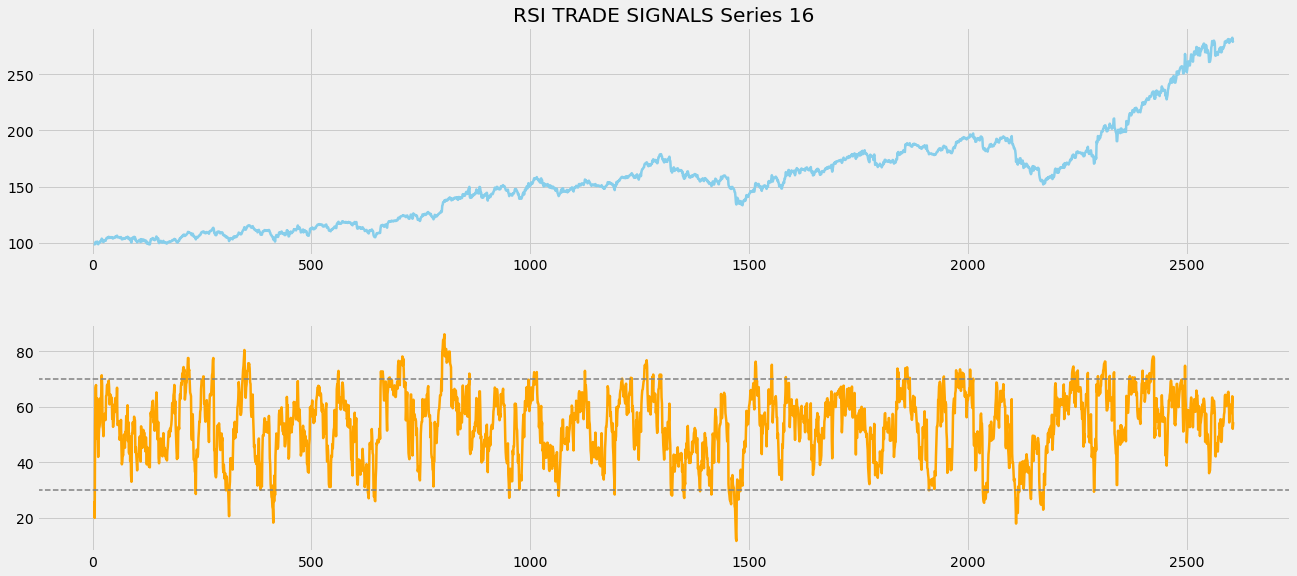

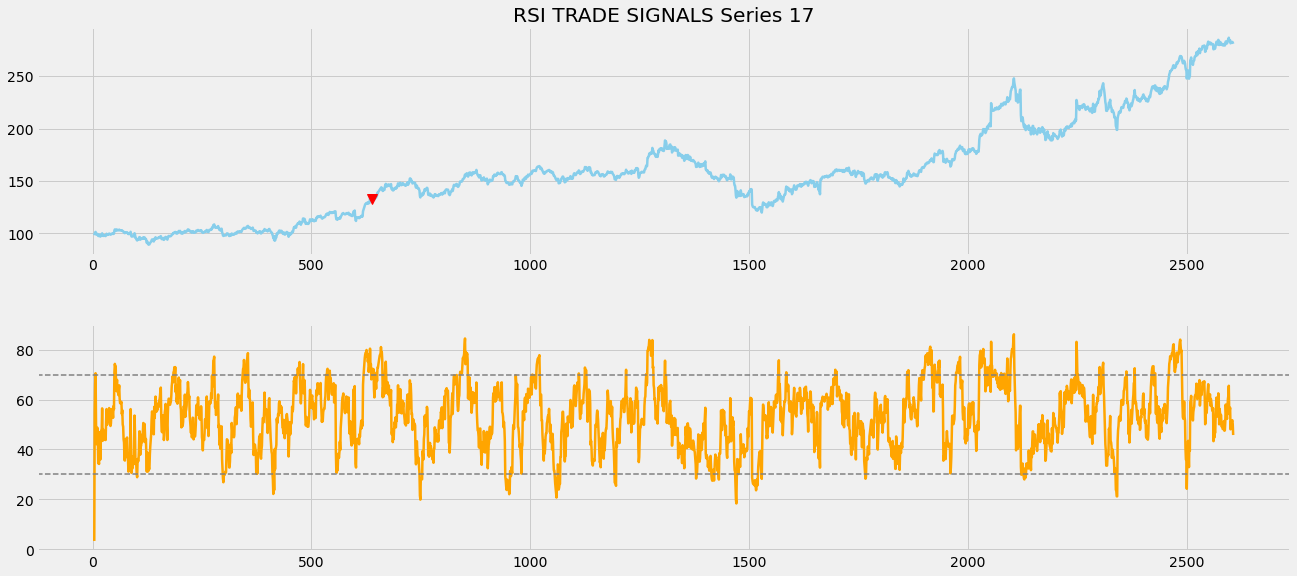

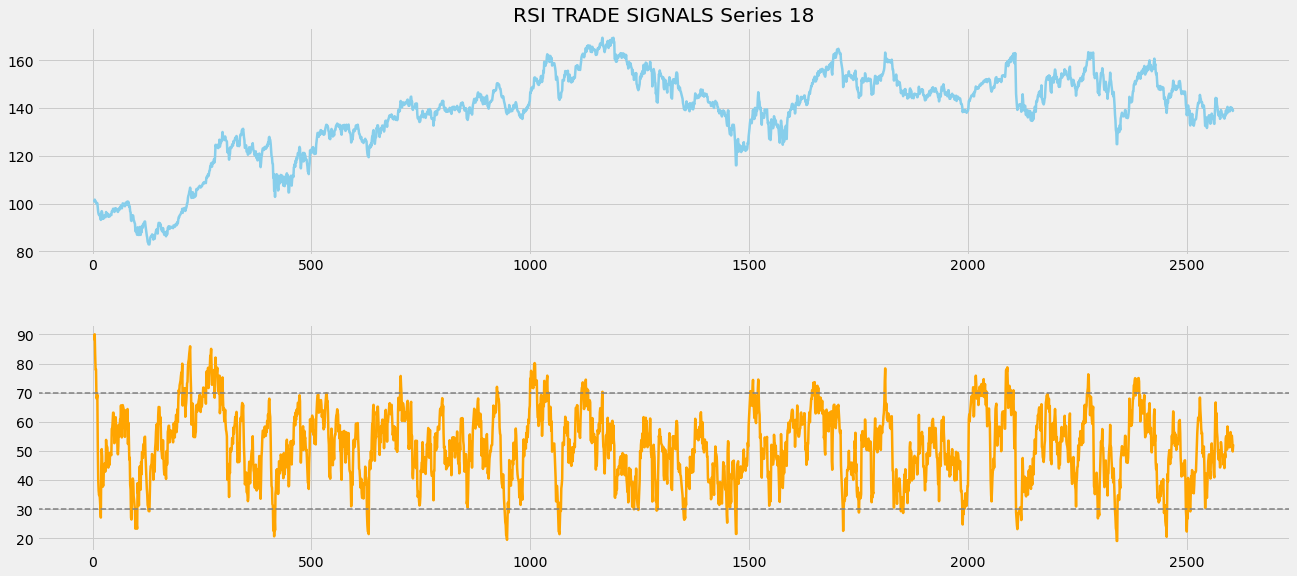

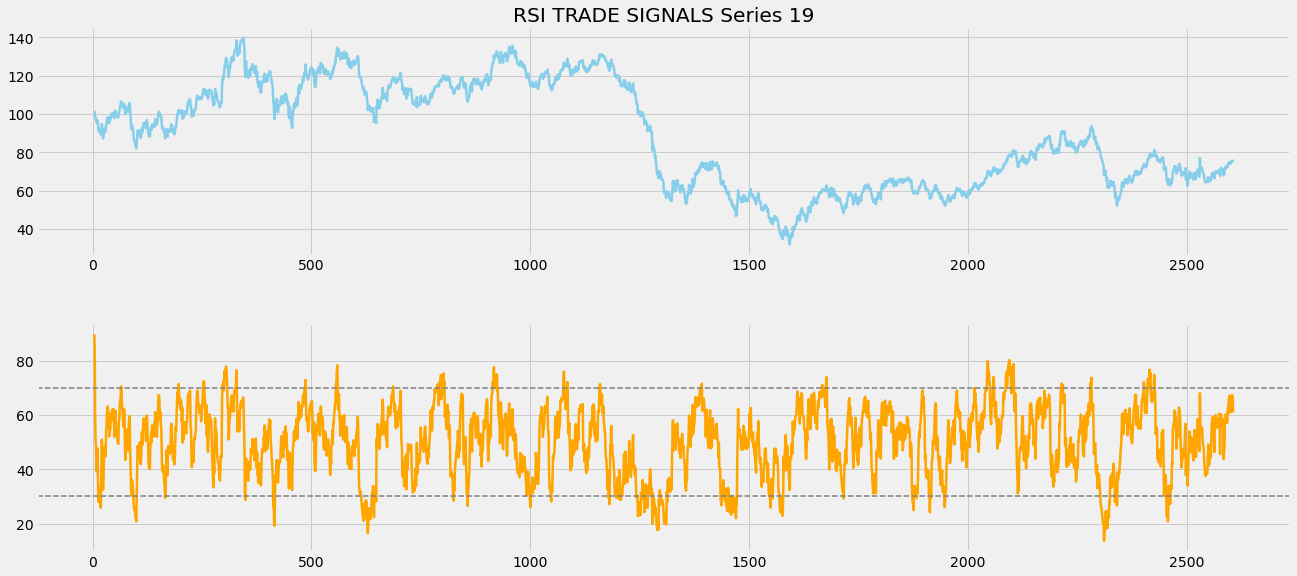

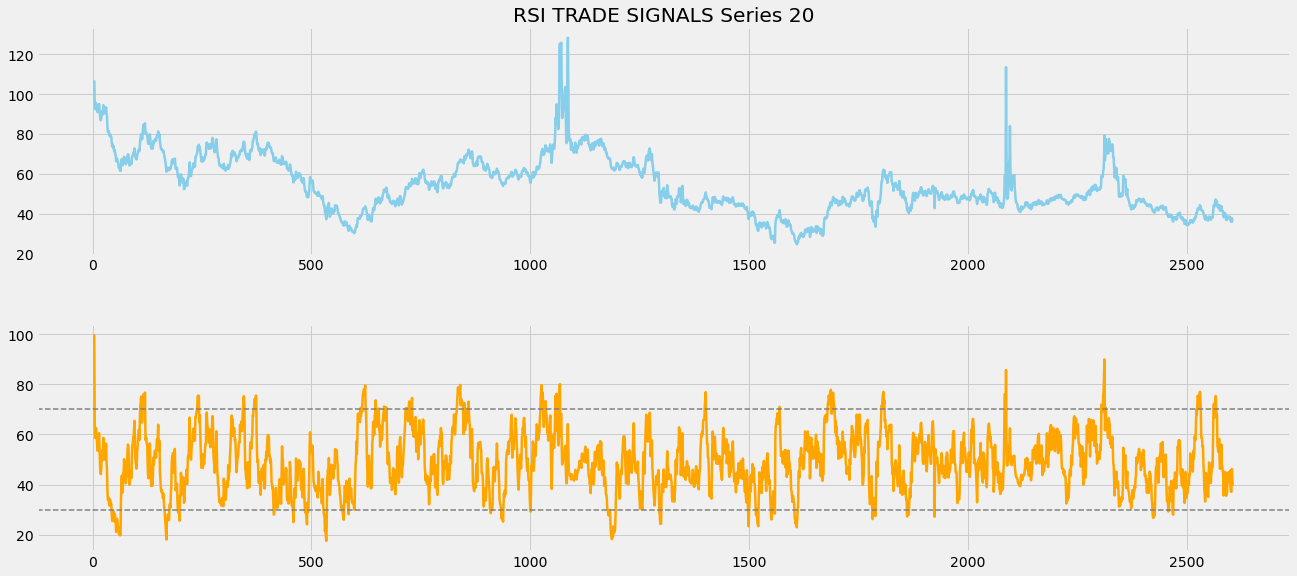

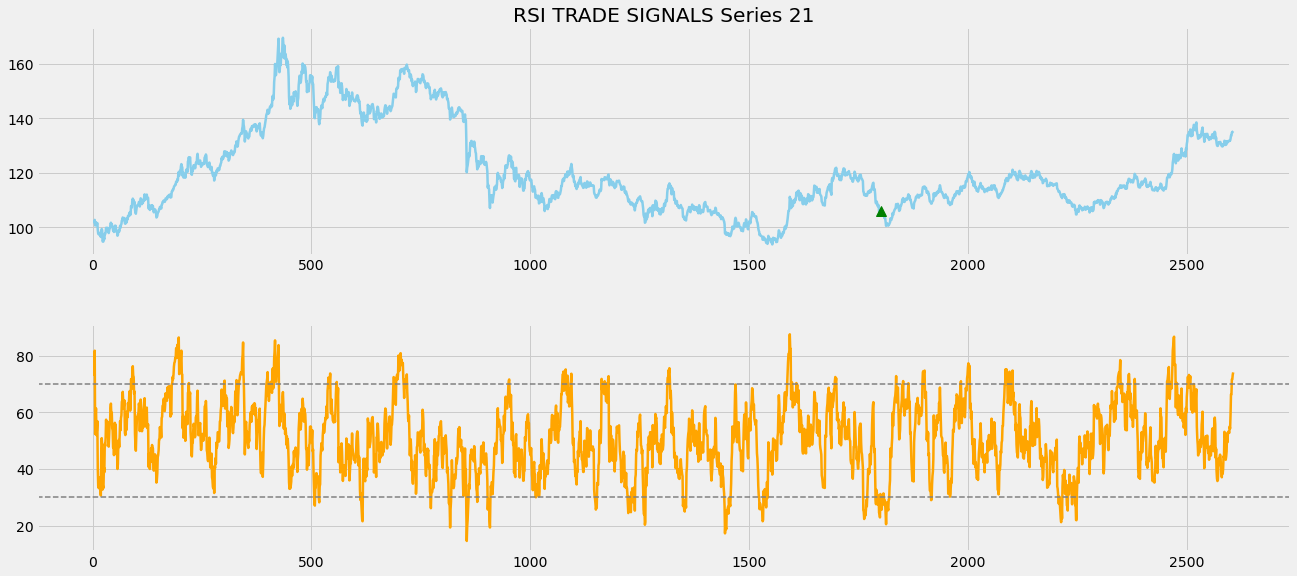

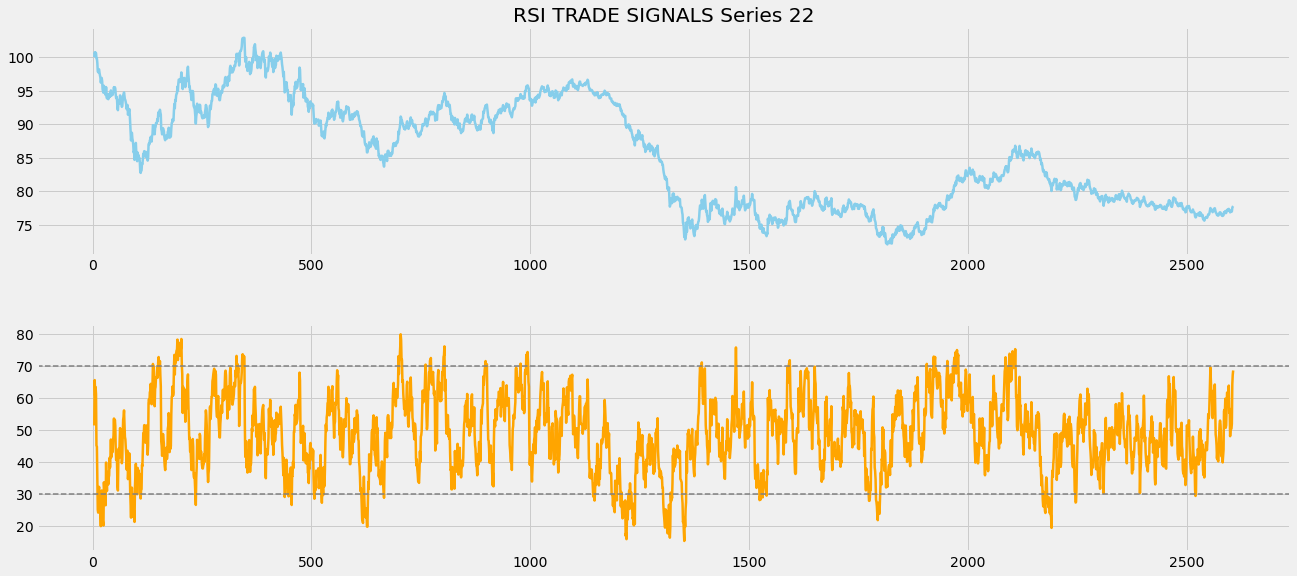

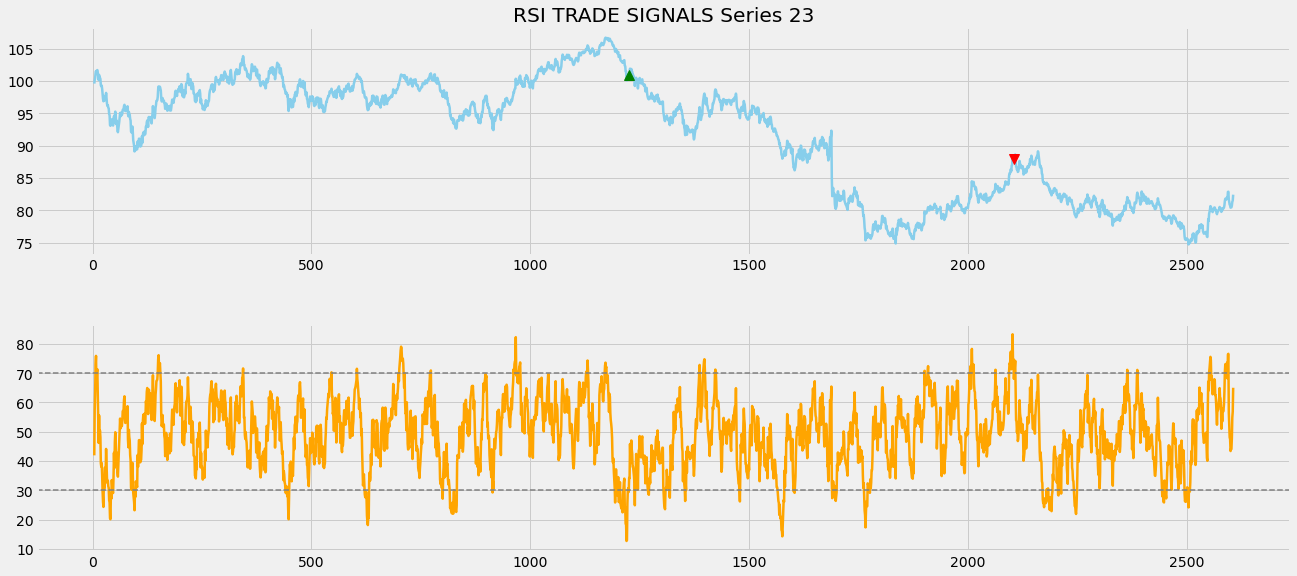

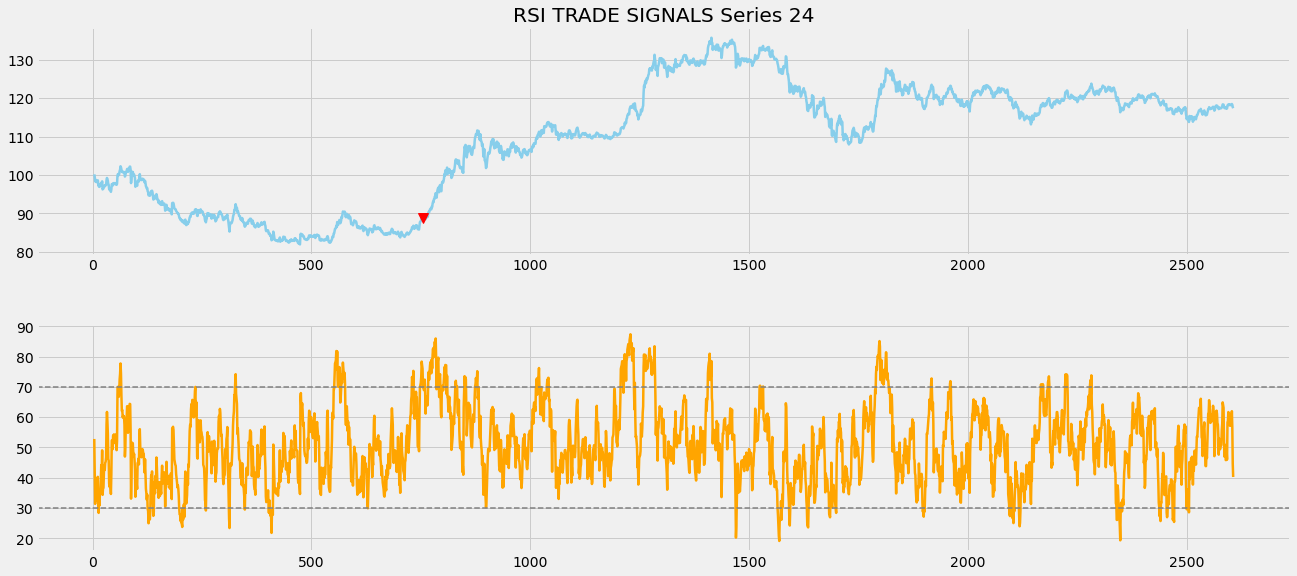

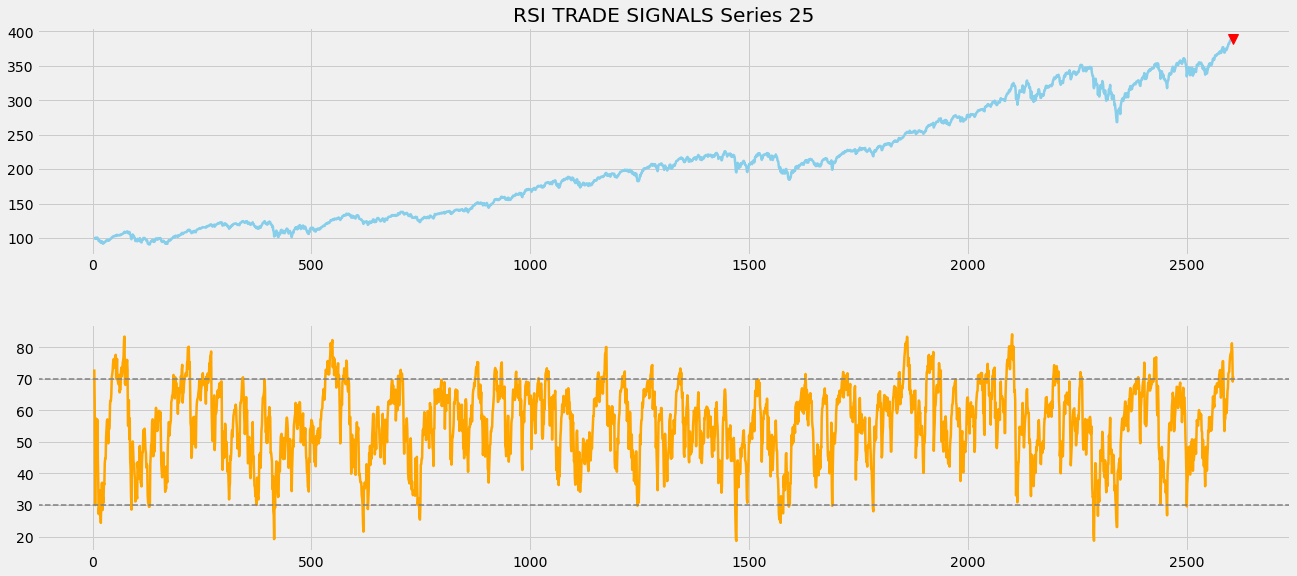

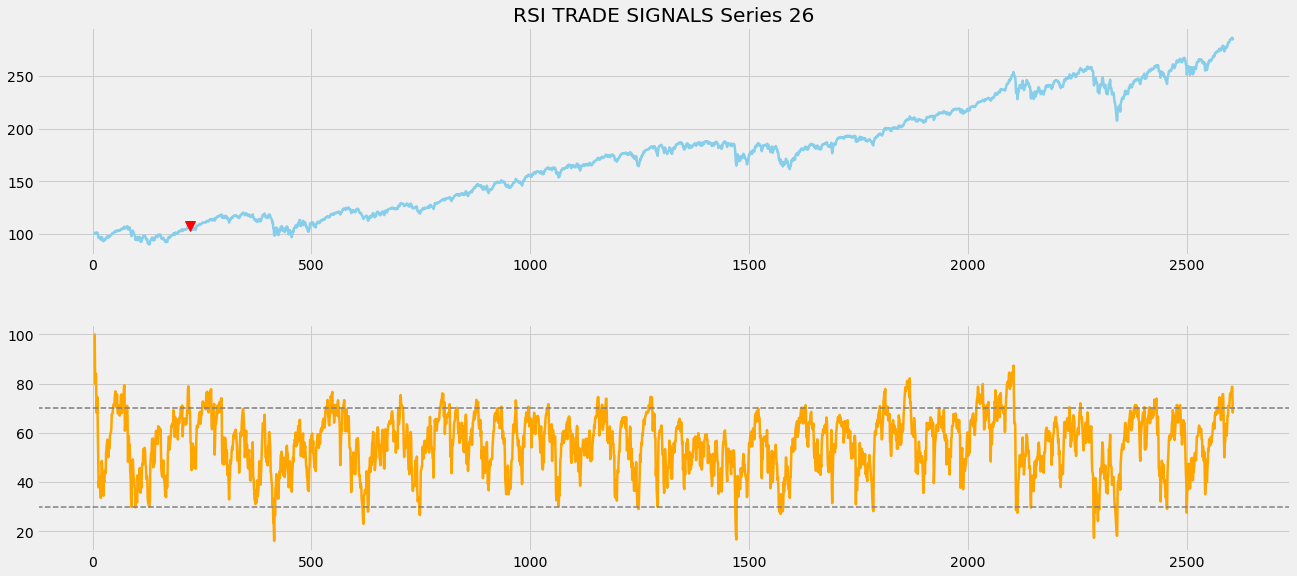

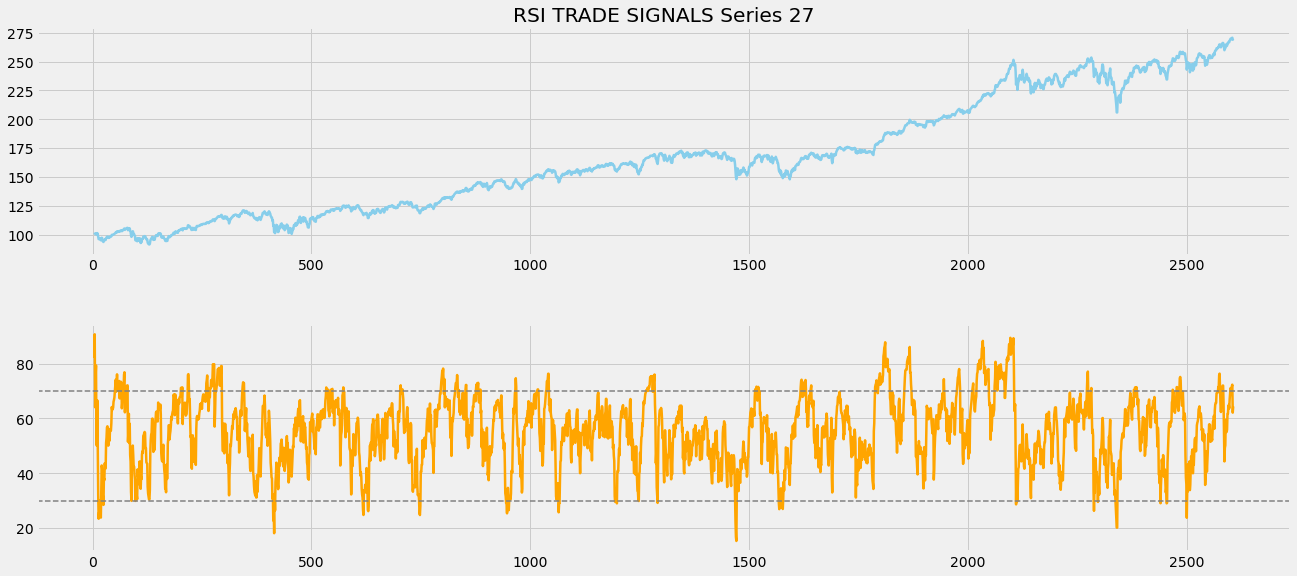

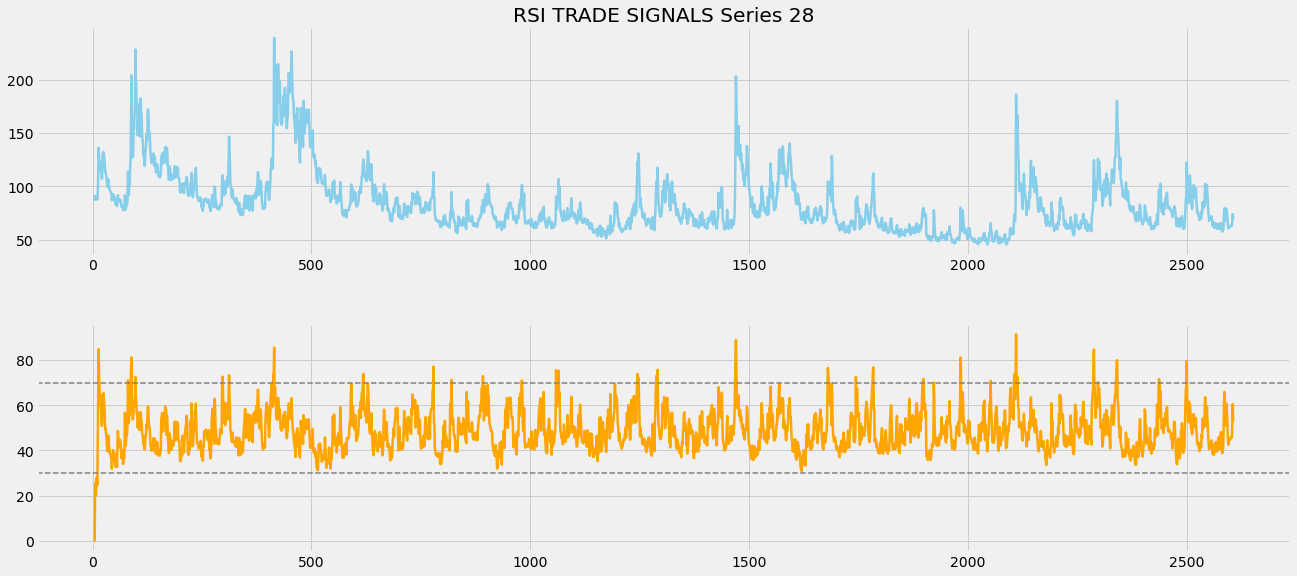

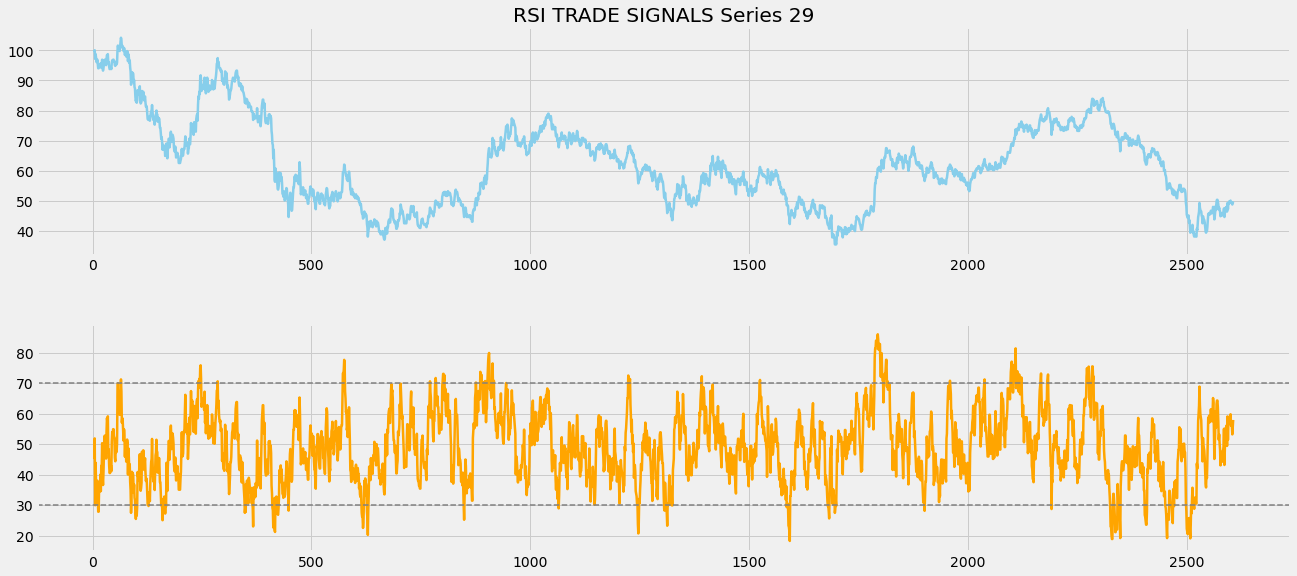

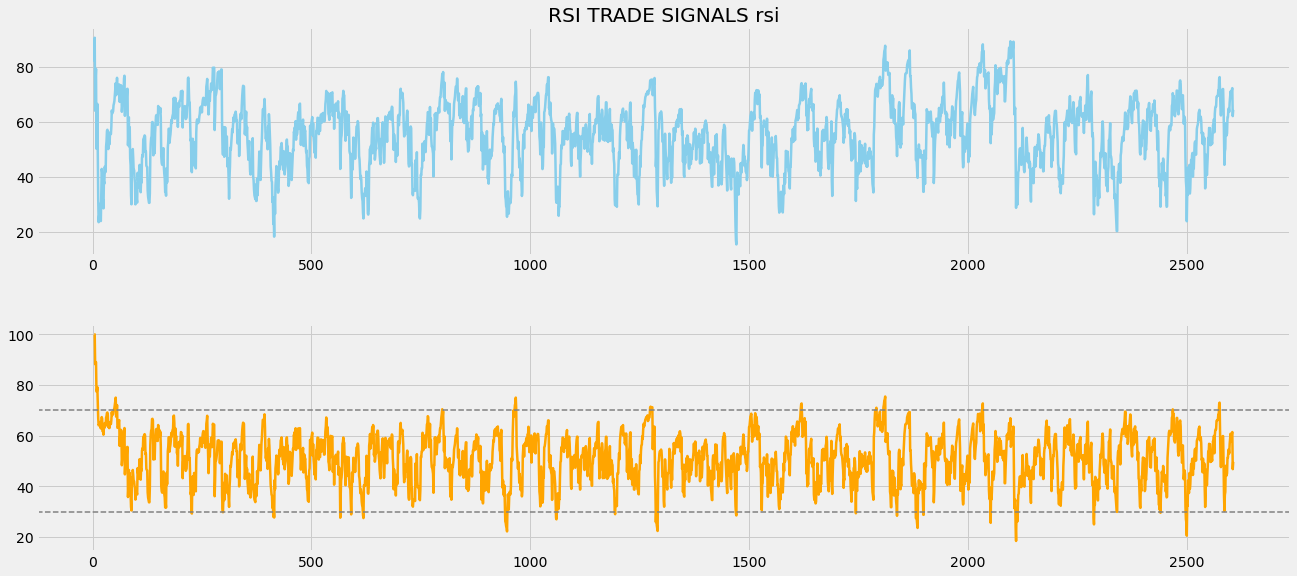

Series 1 Series 2 Series 3 Series 4    Series 5  Series 6  Series 7  \
PnL      0.0      0.0      0.0      0.0 -393.242619  3.507934 -56.20294   

       Series 8 Series 9 Series 10   Series 11 Series 12 Series 13  \
PnL -866.391289     -0.0       0.0 -154.101596       0.0       0.0   

       Series 14 Series 15 Series 16   Series 17 Series 18 Series 19  \
PnL -1252.404843       0.0       0.0 -148.023565       0.0       0.0   

    Series 20 Series 21 Series 22 Series 23  Series 24 Series 25   Series 26  \
PnL       0.0       0.0       0.0   5.52185 -28.595979      -0.0 -177.589387   

    Series 27 Series 28 Series 29  rsi  
PnL      -0.0       0.0       0.0  0.0

In [58]:
# Testing all data (RSI reading can be modified, current: 30/70)


profit_df = pd.DataFrame(columns = df.columns)
profits = pd.DataFrame(columns = df.columns).transpose()

profit = []

for column in df:
    temp_df = df.copy() 
    temp_df['rsi'+column] = get_rsi(temp_df[column], 14)
    temp_df['rsi'+column] = temp_df['rsi'+column][4:]
    temp_df = temp_df.dropna()
    position_temp = implement_rsi_strategy(temp_df[column], temp_df['rsi'+column], MA(df_temp[column], 5), 30, 70)
    position_df = pd.Series(position_temp)
    profit_temp = PnL(temp_df[column], position_df[0])
    profit.append(profit_temp[0])

    #Graph Plotting
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
    ax1.plot(temp_df[column], linewidth = 2.5, color = 'skyblue', label = 'IBM')
    ax1.plot(temp_df.index, position_temp[1], marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
    ax1.plot(temp_df.index, position_temp[2], marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
    ax1.set_title('RSI TRADE SIGNALS ' + column)
    ax2.plot(temp_df['rsi'+column], color = 'orange', linewidth = 2.5)
    ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
    ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
    plt.show()

profits['PnL'] = profit
profits = profits.transpose()
profit_df = pd.concat([profit_df, profits])

profit_df

# Plotting to Excel 
# profit_df.to_excel(r'/Users/halelee/Python/BH Algo/PythonResult.xlsx', sheet_name='Sheet1', index = False)


